## Observations and Insights

## Dependencies and starter code

In [214]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
merged_data=pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [215]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume=merged_data['Tumor Volume (mm3)']
#tumor_volume

#Complete calcuations for mean, median, variance, standard deviation, and SEM
tumor_mean=np.mean(tumor_volume)
tumor_mean

tumor_median=np.median(tumor_volume)
tumor_median

tumor_var=np.var(tumor_volume)
tumor_var

tumor_std=np.std(tumor_volume)
tumor_std

tumor_sem=tumor_volume.sem()
tumor_sem

tumor_volume_df=pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var, 'Standard Deviation':tumor_std, 'SEM': tumor_sem}, index=[0])
tumor_volume_df.round(2)

,Mean,Median,Variance,Standard Deviation,SEM
0,50.45,48.95,79.07,8.89,0.2


## Bar plots

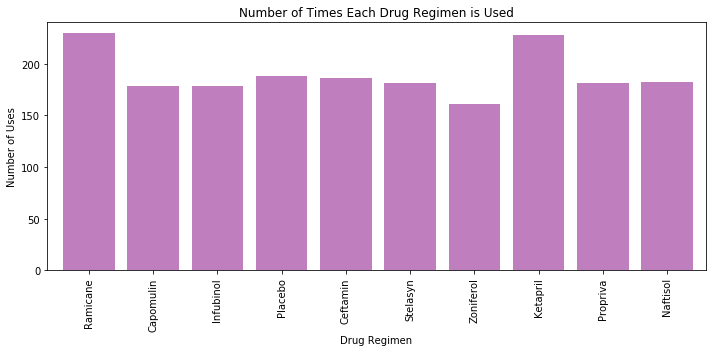

In [216]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
#Create variable for drug regimen count grouped
grouped_drug=merged_data.groupby(['Drug Regimen'])
grouped_drug

grouped_drug_count=grouped_drug['Drug Regimen'].count()
grouped_drug_count
#print(grouped_drug_count)

drug_x_label=merged_data.loc[:,['Drug Regimen']]
#print(drug_x_label)

drug_name_unique=drug_x_label['Drug Regimen'].unique()
#print(drug_name_unique)

#Set x axis and tick locations
x_axis = np.arange(len(grouped_drug_count))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, grouped_drug_count, color='purple', alpha=0.5, align="edge")
plt.xticks(tick_locations, drug_name_unique, rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(grouped_drug_count)+10)

# Set a Title and labels
plt.title("Number of Times Each Drug Regimen is Used")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Uses")

# Show the graph
plt.tight_layout()
plt.show()

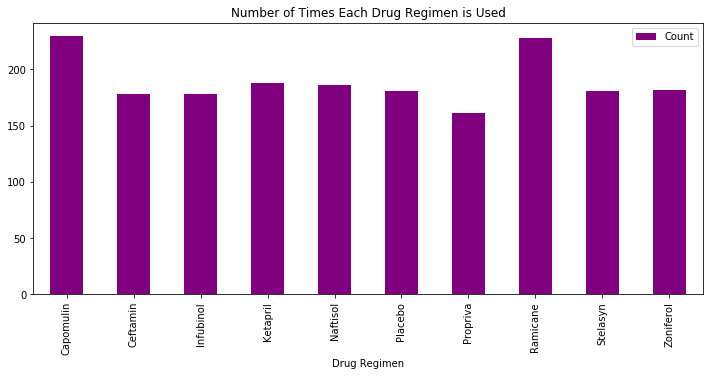

In [249]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Filter the DataFrame down only to those columns to chart
grouped_drug=merged_data.groupby(['Drug Regimen'])
grouped_drug_count=grouped_drug['Drug Regimen'].count()
drug_x_label=merged_data.loc[:,['Drug Regimen']]
drug_name_unique=drug_x_label['Drug Regimen'].unique()

#Create a DataFrame down only to those columns to chart
drug_regimen_df =pd.DataFrame({'Drug Regimen': drug_name_unique, 'Count': grouped_drug_count})
drug_regimen_df

# Use DataFrame.plot() in order to create a bar chart of the data
drug_regimen_df.plot(kind="bar", color='purple', figsize=(12,5))

# Set a title for the chart
plt.title("Number of Times Each Drug Regimen is Used")
plt.show()


## Pie plots

In [218]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [220]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [221]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [222]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [223]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [224]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen